# Furijeove transformacije jednostavnih slika

Sledeći primeri ilustruju kako izgledaju Furijeove transformacije nekih jednostavnih slika koje sadrže horizontalne, vertikalne ili dijagonalne linije.

In [29]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from PIL import Image

In [3]:
def show_spectar(image):
    # get the Fourier coefficients and shifts them
    c = np.fft.fftshift(np.fft.fft2(image))  
    
    fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize=(15,15))
    
    ax1.imshow(image, cmap='gray')
    ax1.axis('off')
    ax1.set_title('Originalna slika')
    
    ax2.imshow(np.abs(c), cmap='gray')
    ax2.axis('off')
    ax2.set_title('Spektar')
    
    
    plt.show()

In [4]:
vertical_lines = Image.open('data/vertikalne_linije.gif').convert("L")

In [5]:
vertical_lines.size

(256, 256)

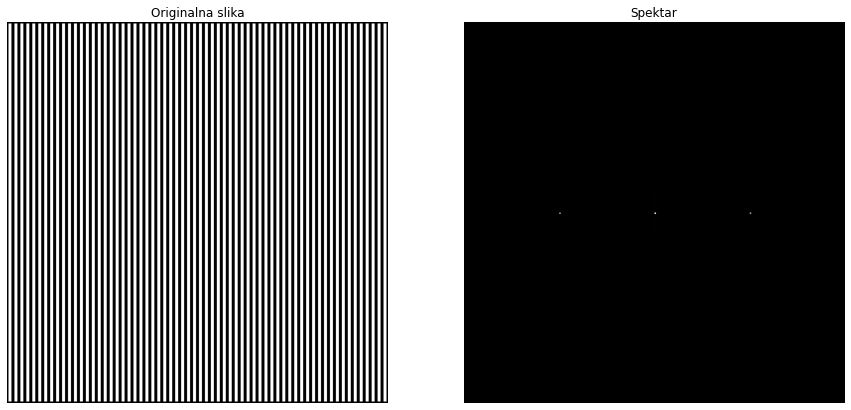

In [6]:
show_spectar(vertical_lines)

Spektar sadrži samo centralnu frekvenciju i dve simetrične frekvencije duž horizontale koja polovi kvadrat.

In [7]:
horizontal_lines = vertical_lines.convert("L").rotate(angle=90) #za pojavanje vidljivosti

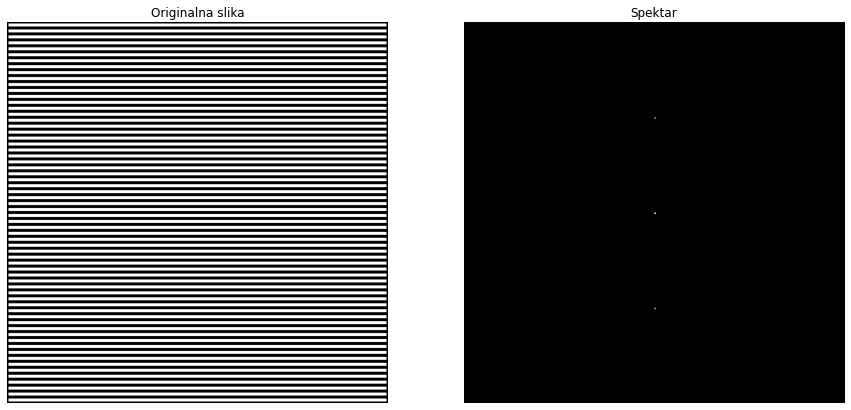

In [8]:
show_spectar(horizontal_lines)

Ovaj spektar sadrži samo centralnu frekvenciju i dve simetrične frekvencije duž vertikale koja polovi kvadrat. Možemo primetiti da je, takođe, zarotiran za 90 stepeni u odnosu na prethodni spektar. 

In [9]:
diagonals = Image.open('data/dijagonalne_linije.gif')

In [10]:
diagonals.size

(256, 256)

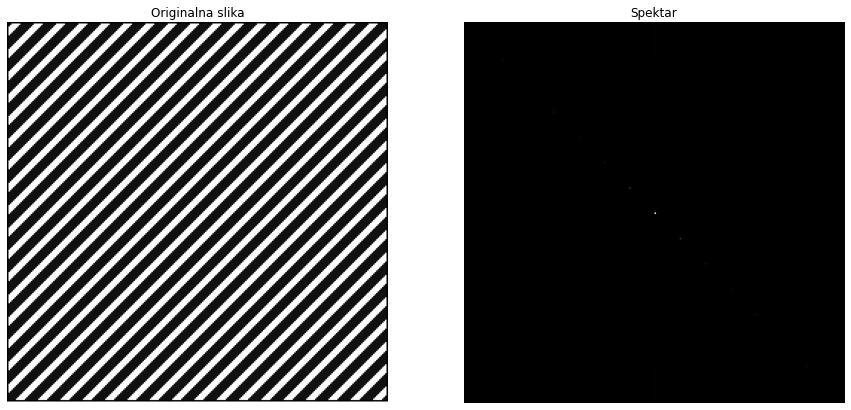

In [11]:
show_spectar(diagonals)

Spektar ove slike sadrži duž glavne dijagonale nekoliko frekvencija skoncentrisanih oko centra.

In [12]:
house = Image.open('data/house.gif')

In [13]:
house.size

(256, 256)

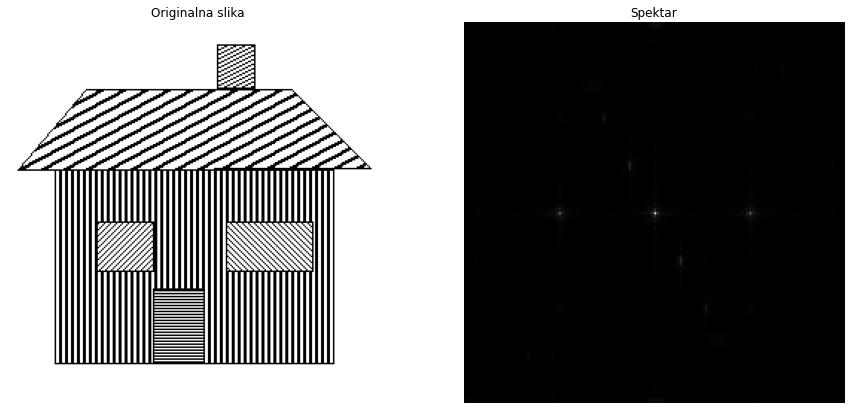

In [14]:
show_spectar(house)

Kako je ova slika kombinuje prethodno pomenute jednostavne slike, vidimo da i njen frekvencijski spektar predstavlja kombinaciju pomenutih spektara.

In [80]:
vertical_lines = Image.open('data/vertikalne_linije.gif').convert("L")

In [81]:
imm = np.ones(vertical_lines.size)
type(imm)

numpy.ndarray

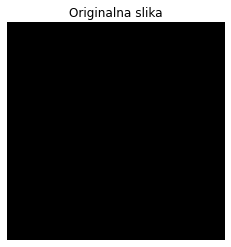

In [82]:
img_org= np.array(imm)
plt.imshow(img_org,cmap = "gray")
plt.axis('off')
plt.title('Originalna slika');

In [103]:
def create_watermark(imgshape, r, n=7500):
    
    # inicijalizujemo generator slucajnih brojeva
    np.random.seed(10)
    
    # vodeni zig je matrica istih dimenzija kao slika
    watermark = np.zeros(imgshape)
    
    # centar kruga je centar slike
    xc = imgshape[0] // 2
    yc = imgshape[1] // 2
    
    for i in range(n):
        # tacka (x, y) na krugu se moze dobiti preko polarnih koordinata
        x = xc + int(r * np.cos(2*np.pi*i/n))
        y = yc + int(r * np.sin(2*np.pi*i/n))
        
        # na odgovarajućoj poziciji se postavlja slučajno 0 ili 1
        watermark[x, y] = np.random.choice([0, 1])
        
    return watermark

In [104]:
watermark = create_watermark(img_org.shape,75)

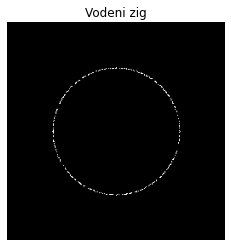

In [105]:
plt.imshow(watermark, cmap='gray')
plt.title('Vodeni zig')
plt.axis('off')
plt.show()

In [126]:
c = np.fft.fft2(watermark)
c_shift = np.fft.fftshift(np.fft.ifft2(c))

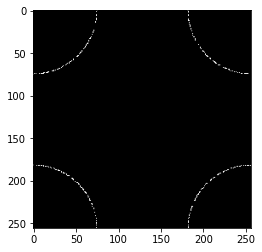

In [127]:
plt.imshow(np.abs(c_shift),"gray")

In [128]:
def add_watermark(img, watermark, alpha):

    c = np.fft.fft2(img)
    c_shifted = np.fft.fftshift(c)
    
    c_protected = c_shifted + alpha * np.fft.fftshift(np.fft.fft2(watermark))
        # because ifft gave us back complex number we extract real value
    return np.abs(np.fft.ifft2(np.fft.ifftshift(c_protected)))

In [129]:
img_protected = add_watermark(img_org, watermark, 50000)
img_protected = Image.fromarray(img_protected)

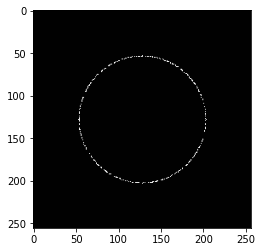

In [130]:
plt.imshow(img_protected)